In [1]:
# this is using the hsnt kernel conda environment

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from __code.step1_prepare_TimePix_images import Step1PrepareTimePixImages

from __code import system

system.System.select_working_dir(facility='SNS', instrument='VENUS', ipts='IPTS-33531')
from __code.__all import custom_style
custom_style.style()

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

# <font color='red'>Input sample folder</font>

This folder will contain all the runs (1 run per angle)

<font color='blue'><b>Instructions</b>: select folder containing runs (projections)</font>

In [2]:
o_white_beam = Step1PrepareTimePixImages(system=system)
o_white_beam.select_top_sample_folder()

logging file: /SNS/VENUS/shared/log/step1_prepare_TimePix_images.log
Top sample folder selected: /SNS/VENUS/IPTS-33699/shared/autoreduce/mcp/September20_2024_PurpleCar_GoldenRatio_CT_5_0_C_Cd_inBeam_Resonance


# <font color='red'>Input Open Beam (OB) folder</font>

Select the images to use as OB

<font color='blue'><b>Instructions</b>: select individual images</font>

In [3]:
o_white_beam.select_top_ob_folder()

Top ob folder selected: /SNS/VENUS/IPTS-33699/shared/autoreduce/mcp/September26_2024_PurpleCar_OpenBean_5_0_C_Cd_inBeam_Resonance


# <font color=red>Pre-processing the data</font>

This step will filter the data using the following criteria

* all the runs that do not have any tif images in it will be **rejected**
* the proton charge of each run will be retrieved and display in a recap graph. It will be up to the users to **select the proton charge** to use as well as the **acceptance criteria**. This is because the proton charge of each run is always slightly different, this criteria define the range for which 2 runs are considered being acquired with the same proton charge.

<img src="__code/__all/TutorialProtonChargeSelection.gif" />

<font color='blue'><b>Instructions</b>

 - Use the sliders to define the **sample proton charge** and **OB proton charge** to use
 - Use the second slider to define the size of the **acceptance criteria range**

<font size=1 color='red'><u>Developer Notes</u>: data are stored in <i>list_of_runs = {DataType.sample: {'Run_1234':
 {Run.full_path: "", Run.proton_charge: "", Run.use_it: "", Run.angle: ""}, ...}</i></font>

In [ ]:
o_white_beam.load_and_check_data()

interactive(children=(FloatSlider(value=5.0, description='sample pc', max=6.39261979793, min=-0.95576512851), …

This will recap the list of runs that will be used for SAMPLE and OB. 

<font color='blue'><b>Instructions</b>: Because some runs look like they are ok but still need to be rejected, **Feel free to manually select any run you want to exclude !**</font>

<font size=1 color='red'><u>Developer Notes</u>: this step will set the <i>Run.use_it</i> parametere of the <i>list_of_runs> dictionary. 

In [5]:
o_white_beam.recap_data()

Button(description='Clear All', style=ButtonStyle())

## Combine all the images within each run

This step will first load the data to keep, then add all the counts within a given run, making it feel like the data were acquired in white beam mode, loosing the time-of-flight (TOF) information. This step will also sort the runs by increasing angle value.

<font size=1 color=red><u>Developer Notes</u>: change the value of <i>Run.use_it</i> for runs rejected and combine runs data in <i>master_3d_data_array = {DataType.sample: [runs, y, x], ...}</font>

In [6]:
o_white_beam.combine_images()

100%|██████████| 6/6 [00:16<00:00,  2.81s/it]


<hr><hr style="border-bottom: dotted 1px;" />
<font color='purple' size='5'>Visualization</font><font color='purple' size='3'> - OPTIONAL</font>

Select the mode you want to use:
 - all images <b>(this may take a long time to process !)</b>
 - visual verification of raw and ob

In [ ]:
o_white_beam.how_to_visualize()

In [ ]:
o_white_beam.visualize_raw_data()

<hr style="height: 2px" /><hr style="border-bottom: dotted 1px" />
<font color='purple' size='5'>Crop the raw data</font><font color='purple' size='3'> - OPTIONAL</font>

<font size=1 color='red'><u>Developer Notes</u>: this step will update the dictionary <i>master_3d_data_array</i>

In [ ]:
o_white_beam.pre_processing_crop_settings()

interactive(children=(IntSlider(value=5, description='left', layout=Layout(width='50%'), max=511), IntSlider(v…

execute the cropping

In [8]:
o_white_beam.pre_processing_crop()

<hr style="height: 2px" /><hr style="border-bottom: dotted 1px" />
<font color='purple' size='5'>Remove outliers</font><font color='purple' size='3'> - OPTIONAL</font>

Three algorithms are provided:

* using `in-house` method with histogram (remove dead pixels and abnormal very high counts)
* using Tomopy `remove_outlier` method (remove high intensity bright spots)
* using Scipy `gamma_filter` method

<font color='blue'><b>Instructions</b>: select the algorithms you want to use.

<font size=1 color='red'><u>Developer Notes</u>: this step will update the dictionary <i>master_3d_data_array</i>

In [9]:
o_white_beam.clean_images_settings()

The next cell will be ignored if you didn't select <b>histogram</b>. 

<font color='blue'><b>Instructions</b>: if using the <b>histogram</b> algorithm, by default, all the pixels found in the first and last bin are considered as **bad** pixels. You have the option to change those settings. </font>

In [10]:
o_white_beam.clean_images_setup()

HTML(value='<h2> Tomopy settings </h2>')

FloatSlider(value=20.0, description='Diff value', min=1.0)

Launch the cleaning

In [11]:
o_white_beam.clean_images()

<hr><hr style="border-bottom: dotted 1px;" />
<font color='purple' size='5'>Visualization</font><font color='purple' size='3'> - OPTIONAL</font>

Select the mode you want to use:
 - all images <b>(this may take a long time to process !)</b>
 - visual verification of raw, ob and dc

### How do you want to visualize the cleaned data?

In [ ]:
o_white_beam.how_to_visualize_after_cleaning()

Launch the visualization

In [ ]:
o_white_beam.visualize_cleaned_data()

<hr style="border-bottom: dotted 1px;" />
<hr style="height: 2px" />

# <font color='red'>Normalization</font>


<font color='blue'><b>Instructions</b>: in order to improve the normalization, you can turn ON/OFF any of the following 

- <font color=red><b>use proton charge</b></font>: that option will use the proton charge value requested for each runs and open beams and will bring them to the same value by applying a coefficient corector to the data.
- <font color=red><b>use acqusition number</b></font>: that option will use the acquisition number (if found) to match them between runs and apply a coefficient corector to the data.
- <font color=red><b>use background region of interest (ROI)</b></font>: select a region that does not contain any part of the sample in order to match the counts with the same ROI of the open beam.</font>s</i>

In [12]:
o_white_beam.normalization_settings()

This next cell will allow you to select the background region within the projections images, or will just be ignored if you not chose to use it.

<font color='blue'><b>Instructions</b>: define ROI

Make sure you select a region <font color='red'> OUTSIDE</font> of your sample

<img src="__code/__all/demo_of_roi_selection.gif" width="50%" />

NB: The next cell will be ignored if you didn't select <b>Use ROI</b>

In [13]:
o_white_beam.normalization_select_roi()

This cell will perform the normalization using any of the settings you define just above.

In [14]:
o_white_beam.normalization()

<hr style="height: 2px" /><hr style="border-bottom: dotted 1px" />
<font color='purple' size='5'>Visualize normalized data</font><font color='purple' size='3'> - OPTIONAL</font>

In [ ]:
o_white_beam.visualization_normalization_settings()

In [ ]:
o_white_beam.visualize_normalization()

<hr style="height: 2px" /><hr style="border-bottom: dotted 1px" />
<font color='purple' size='5'>Export the normalized data</font><font color='purple' size='3'> - OPTIONAL</font>


Select the folder where to export the normalized images


In [ ]:
o_white_beam.select_export_normalized_folder()

Run this cell to execute the export of the normalized images


In [ ]:
o_white_beam.export_normalized_images()

<hr style="border-bottom: dotted 1px;" />
<hr style="height: 2px" />

# <font color='red'>Chips correction (timepix)</font>

In [15]:
o_white_beam.chips_correction()

<hr style="height: 2px" /><hr style="border-bottom: dotted 1px" />
<font color='purple' size='5'>Visualization</font><font color='purple' size='3'> - OPTIONAL</font>

In [ ]:
o_white_beam.visualize_chips_correction()

<hr style="height: 2px" /><hr style="border-bottom: dotted 1px" />
<font color='purple' size='5'>Rebin pixels</font><font color='purple' size='3'> - OPTIONAL</font>

<font size=1 color='red'><u>Developer Notes</u>: this step will update the 3d array <i>normalized_images</i></font>

Select how you want to combine (bin) the pixels

In [ ]:
o_white_beam.rebin_settings()

Perform the binning

In [ ]:
o_white_beam.rebin()

<hr style="height: 2px" /><hr style="border-bottom: dotted 1px" />
<font color='purple' size='5'>Visualize rebinned data</font><font color='purple' size='3'> - OPTIONAL</font>

In [ ]:
o_white_beam.visualization_normalization_settings()

In [ ]:
o_white_beam.visualize_rebinned_data()

<hr style="height: 2px" /><hr style="border-bottom: dotted 1px" />
<font color='purple' size='5'>Crop the data</font><font color='purple' size='3'> - OPTIONAL</font>

<font size=1 color='red'><u>Developer Notes</u>: this step will update the 3d array <i>normalized_images</i>

In [ ]:
o_white_beam.crop_settings()

interactive(children=(IntSlider(value=5, description='left', layout=Layout(width='50%'), max=496), IntSlider(v…

execute the cropping

In [17]:
o_white_beam.crop()

<hr style="height: 2px" /><hr style="border-bottom: dotted 1px" />
<font color='purple' size='5'>Rotate the data</font><font color='purple' size='3'> - OPTIONAL</font>

<font color='blue'>The reconstruction algorithm will ONLY work if the rotation axis is VERTICAL</font>!

select the angle to use!

<font size=1 color='red'><u>Developer Notes</u>: this step will update the 3d array <i>normalized_images_log</i>

In [ ]:
o_white_beam.rotate_data_settings()

Run to perform the transformation by the angle specified

In [ ]:
o_white_beam.apply_rotation()

Vizualize the images after rotation - OPTIONAL

In [ ]:
o_white_beam.visualize_after_rotation()

<hr style="border-bottom: dotted 1px;" />
<hr style="height: 2px" />

# <font color='red'>Minus log conversion</font>

<font size=1 color='red'><u>Developer Notes</u>: this step will create the 3d array <i>normalized_images_log</i>

In [18]:
o_white_beam.log_conversion_and_cleaning()

<hr><hr style="border-bottom: dotted 1px;" />
<font color='purple' size='3'>Visualization</font><font color='purple' size='3'> - OPTIONAL</font>


In [ ]:
o_white_beam.visualize_images_after_log()

<hr style="height: 2px" /><hr style="border-bottom: dotted 1px" />
<font color='purple' size='5'>Remove stripes</font><font color='purple' size='3'> - OPTIONAL</font>

Run if you want to remove any stripes causing ring artifacs in the reconstruction

<font size=1 color='red'><u>Developer Notes</u>: this step will update the 3d array <i>normalized_images_log</i>

In [19]:
o_white_beam.select_remove_strips_algorithms()

HTML(value='<font size=4><b>Select the algorithms to use (CTRL + CLICK to select more than one)</b></font>')

Button(button_style='info', description='Algorithms documentation ...', layout=Layout(width='max-content'), st…

Define the settings for the algorithms you chose in the previous cell

In [20]:
o_white_beam.define_settings()

Accordion(children=(VBox(children=(FloatText(value=3.0, description='snr'), IntText(value=61, description='la_…

perform the cleaning

In [21]:
o_white_beam.remove_strips()

np.shape(tomography_array) = (77, 494, 483)


100%|██████████| 1/1 [00:02<00:00,  2.22s/it]


<hr><hr style="border-bottom: dotted 1px;" />
<font color='purple' size='3'>Visualization</font><font color='purple' size='3'> - OPTIONAL</font>

In [ ]:
o_white_beam.display_removed_strips()

<hr style="height: 2px" /><hr style="border-bottom: dotted 1px" />
<font color='purple' size='5'>Calculate and apply tilt correction</font><font color='purple' size='3'> - OPTIONAL</font>

The algorithm will determine the 0 and 180 degrees runs and use those to calculate the <b>tilt</b> then apply it on the volume.
<br><br>

<font color='blue'><b>Instructions</b>: first, you need to select an vertical range contaning the sample

<font color='blue'>TIPS</font> - Make sure the sample is within the range defined

<font size=1 color='red'><u>Developer Notes</u>: this step will update the 3d array <i>normalized_images_log</i>

In [22]:
o_white_beam.select_sample_roi()

interactive(children=(IntSlider(value=0, description='y_top', max=493), IntSlider(value=493, description='y_bo…

Perform the calculation of the tilt and apply it

> Finding the rotation axis position...
Rotation axis Found!
offset = 0.5    tilt angle = -0.013848305323175733 °
average of residuals  =  0.05092682


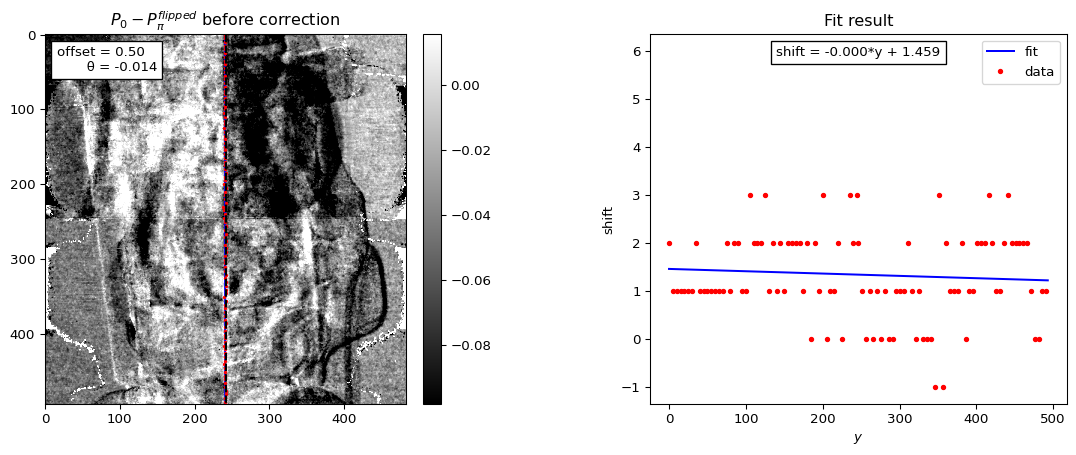

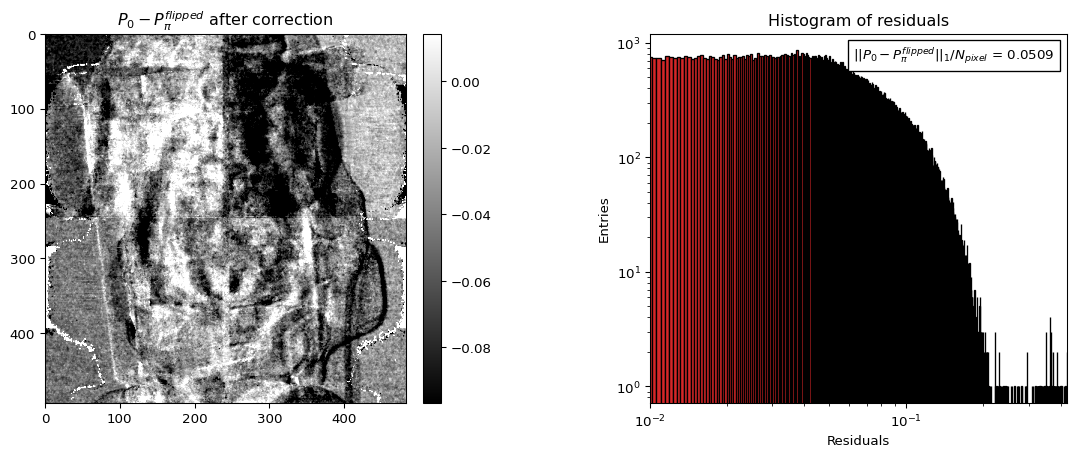

> Correcting rotation axis misalignment...


100%|██████████| 77/77 [00:00<00:00, 730.49 images/s]


In [23]:
o_white_beam.perform_tilt_correction()

<hr style="height: 2px" /><hr style="border-bottom: dotted 1px" />
<font color='purple' size='5'>Calculate center of rotation</font><font color='purple' size='3'> - OPTIONAL</font>

The algorithm will determine the 0 and 180 degrees runs and use those to calculate the <b>center of rotation</b> 

<font size=1 color='red'><u>Developer Notes</u>: this step will use the 3d array <i>normalized_images_log</i>

In [24]:
o_white_beam.center_of_rotation_settings()

RadioButtons(options=('Automatic', 'Manual'), value='Automatic')

Select the mode you want to use to calculate the **center of rotation**

* **automatic mode** will use the [algotom](https://algotom.github.io) library
* **manual mode** will let you figure out the center of rotation

<font color=red>NB</font>: if you selected **automatic mode**, first, you will need to select the 180 or 360 degrees mode to use to estimate the center of rotation.

In [25]:
o_white_beam.run_center_of_rotation()

interactive(children=(SelectMultiple(description='angles', index=(0, 1), options=('0 degree', '180 degree', '3…

In [26]:
o_white_beam.run_center_of_rotation_or_skip_it()

center of rotation selected: 241


<hr><hr style="border-bottom: dotted 1px;" />
<font color='purple' size='3'>Visualization</font><font color='purple' size='3'> - OPTIONAL</font>

In [ ]:
o_white_beam.display_center_of_rotation()

<hr style="height: 2px" /><hr style="border-bottom: dotted 1px" />
<font color='purple' size='5'>Test reconstruction</font><font color='purple' size='3'> - OPTIONAL</font>

<b>Select a couple of slices to use to reconstruct</b>. 

This will allow to test:
- the calculation of the center of rotation
- tilt angle value
- cleaning of the data (outlisers, stripes)
- more ...

In [27]:
o_white_beam.select_slices_to_use_to_test_reconstruction()

interactive(children=(IntSlider(value=0, continuous_update=False, description='image_index', layout=Layout(wid…

Perform the reconstruction on those slices

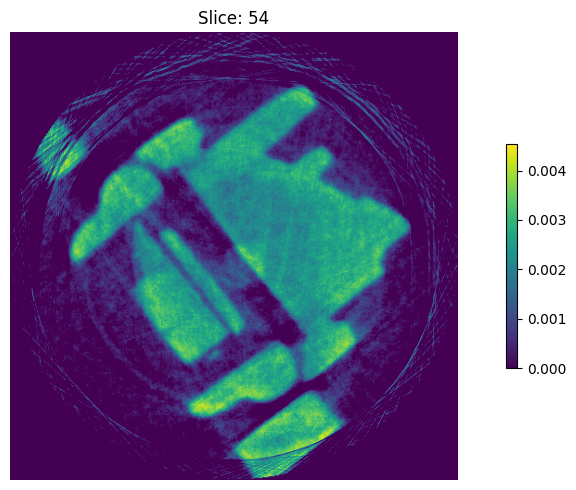

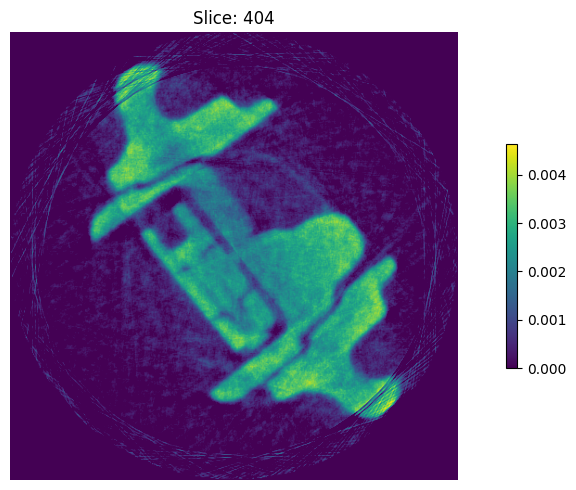

In [28]:
o_white_beam.run_reconstruction_of_slices_to_test()

<hr style="border-bottom: dotted 1px;" /><hr style="height: 2px" />

# <font color='red'>Select reconstruction method(s)</font>

In [29]:
o_white_beam.select_reconstruction_method()

HTML(value='<font size=5 color=blue>Select reconstruction algorithm(s)</font>')

HTML(value='<font size=3 color=black>Multiple selection allowed by <b>CTRL+click</b></font>')

# <font color='red'>Set up reconstruction parameters</font>

<font color='blue'><b>Instructions</b>: 

- define the reconstruction settings (keeping the <b>default values</b> is a good choice for novice users)</font>



In [30]:
o_white_beam.reconstruction_settings()

# <font color='red'>Create config file and export pre-processed images</font>

* <b>config file</b> will be used in the next step (step1_####.json)
* <b>log file</b> to check the full process up to here
* <b>stack of projectons ready to be reconstructed</b>

In [31]:
o_white_beam.select_export_extra_files()

Top extra folder selected: /SNS/VENUS/IPTS-33699/shared/processed_data/jean_test


In [32]:
o_white_beam.export_extra_files(prefix='step1')

77it [00:00, 275.88it/s]

projections exported in /SNS/VENUS/IPTS-33699/shared/processed_data/jean_test/September20_2024_PurpleCar_GoldenRatio_CT_5_0_C_Cd_inBeam_Resonance_projections_pre_data_02m_10d_2025y_17h_20mn
top output folder: /SNS/VENUS/IPTS-33699/shared/processed_data/jean_test


<hr style="border-bottom: dotted 1px;" /><hr>